In [35]:
import numpy as np
import matplotlib.pyplot as plt
from cmap import Colormap

In [41]:
# Parameters
x0 = -1.0
xN = 1.0
L = 2.0           
nx = 1001          
dx = L / (nx - 1) 
nu = 0.01 / np.pi 
dt = 0.0005       
nt = int(1 / dt)  

In [55]:
cmap = Colormap("tol:nightfall").to_mpl()
# cmap = Colormap("crameri:batlow").to_mpl()

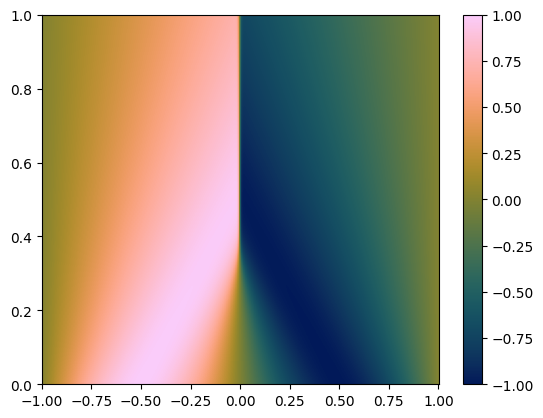

In [ ]:
xs = np.linspace(x0, xN, nx)
U = np.zeros((nx, nt + 1))

U[:, 0] = -np.sin(np.pi * xs)

for n in range(nt):
    U[1:-1, n + 1] = (
        U[1:-1, n] 
        - dt / (2 * dx) * U[1:-1, n]  * (U[2:, n] - U[:-2, n])  # Nonlinear advection term
        + nu * dt / dx**2 * (U[2:, n] - 2 * U[1:-1, n] + U[:-2, n])  # Diffusion term
    )
    U[0, n + 1] = U[-1, n + 1] = 0

ts = np.linspace(0, nt * dt, nt + 1)

X, T = np.meshgrid(xs, ts)

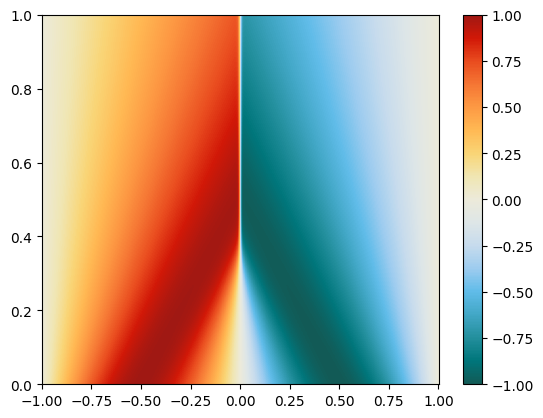

In [56]:
p = plt.pcolormesh(X, T, U.T, cmap=cmap)
plt.colorbar(p)